# **BUILDING BASIC SENTIMENT MODEL USING WORD EMBEDDINGS**

**WORD EMBEDDINGS**

+ Word Embeddings are Clusters of Vectors in Multi Dimensional Space.
+ Each vector represents a given word in that space.

**BUILDING A BASIC SENTIMENT MODEL**

+ Using the tf.keras.layers.Embedding Layer from tf keras. It needs arguments as 
  + Size of Tokenized Vocabulary.
  + How many Embedding Dimension to Use.
  + Input Length = max length of Sequence (did you pad / truncate)

+ Output is not ready for the Dense / Fully Connected Layer.
  + Use Flatten() or GlobalAveragePooling1D() layer.

+ Follow with any Dense Layers, with final Output of Shape 1.

IMPORT THE LIBRARIES

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

GET THE DATASET

We use a dataset containing Amazon and Yelp reviews, with their related sentiment (1 for positive, 0 for negative)

In [5]:
!wget --no-check-certificate \-O /tmp/sentiment.csv https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P

--2023-03-07 05:43:48--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 142.251.107.101, 142.251.107.102, 142.251.107.113, ...
Connecting to drive.google.com (drive.google.com)|142.251.107.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gkcg8aakv529v6ckotjpe29jmurgg94q/1678167825000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=c37eb574-d163-4b79-849f-1e1d96867415 [following]
--2023-03-07 05:43:48--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gkcg8aakv529v6ckotjpe29jmurgg94q/1678167825000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P?uuid=c37eb574-d163-4b79-849f-1e1d96867415
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connecting to d

LOAD THE DATASET

In [6]:
## load the data into the pandas dataframe
dataset = pd.read_csv('/tmp/sentiment.csv')
dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [10]:
## get the sentences into text list
sentences = dataset["text"].tolist()
print(len(sentences))
for sentence in sentences:
  print(sentence)
## similarly get the snetiment to list
labels = dataset['sentiment'].tolist()
print(labels)

1992
So there is no way for me to plug it in here in the US unless I go by a converter.
Good case Excellent value.
Great for the jawbone.
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
The mic is great.
I have to jiggle the plug to get it to line up right to get decent volume.
If you have several dozen or several hundred contacts then imagine the fun of sending each of them one by one.
If you are Razr owner...you must have this!
Needless to say I wasted my money.
What a waste of money and time!.
And the sound quality is great.
He was very impressed when going from the original battery to the extended battery.
If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.
Very good quality though
The design is very odd as the ear "clip" is not very comfortable at all.
Highly recommend for any one who has a blue tooth phone.
I advise EVERYONE DO NOT BE FOOLED!
So Far So Good!.
Works great!.
It clicks int

In [17]:
# Separate out the sentences and labels into training and test sets
## 80% for training and 20% for testing
print("Full Data Size :---",len(sentences))
training_size = int(len(sentences) * 0.8)
print("Training Data Size :---",training_size)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

print("Training Data Size :--",len(training_sentences))
print("Testing Data Size :--",len(testing_sentences))
print("Training Labels Size :--",len(training_labels))
print("Testing Labels Size :--",len(testing_labels))

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

print("Training Labels Shape:---", training_labels_final.shape)
print("Testing Labels Shape:---", testing_labels_final.shape)

Full Data Size :--- 1992
Training Data Size :--- 1593
Training Data Size :-- 1593
Testing Data Size :-- 399
Training Labels Size :-- 1593
Testing Labels Size :-- 399
Training Labels Shape:--- (1593,)
Testing Labels Shape:--- (399,)


TOKENIZE THE DATASET

+ Include the Padding
+ Include the OOV

In [31]:
##size of the vocabulary
vocab_size = 1000
## embedding dimension
embedding_dim = 16
## maximum length
max_length = 100
## truncating type
trunc_type='post'
## padding type
padding_type='post'
## oov token
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print("============WORD INDEXES==============")
## define the tokenizer 
## num_words = 1000
## oov token = "OOV"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
## tokenize the training snetences
tokenizer.fit_on_texts(training_sentences)
## check for the word index
word_index = tokenizer.word_index
## print the word index
print(word_index)
print("Length of the Word Index :--", len(word_index))

print("=============SEQUENCES FROM THE SENTENCES==============")
## make sequences from the sentences.
sequences = tokenizer.texts_to_sequences(training_sentences)
print("Length of the Sequences :--",len(sequences))
for sequence in sequences:
  print(sequence)

print("==============PADDED SEQUENCES FROM THE ABOVE SEQUENCES=================")
## get the sequences from sentences after padding.
## get the padded sequence from the given sequence.
## maxlen = max_length
## padding = "post"
## truncating = "post"
padded = pad_sequences(sequences,
                       maxlen=max_length, 
                       padding=padding_type, 
                       truncating=trunc_type)
print("Length of the Padded Sequences :--",len(padded))

for padded_sequence in padded:
  print(padded_sequence)

Streaming output truncated to the last 5000 lines.
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[103  14 209   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
[134 335 336   3  48  19  18  12   1   1 408   1   1   1  15   3 683   1
  52  16  74   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

In [33]:
## tokeinzing and padding the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,
                               maxlen=max_length, 
                               padding=padding_type, 
                               truncating=trunc_type)
print("Testing Sequences Length :--", len(testing_sequences))
print("Padded Testing Sequences Length :--", len(testing_padded))

Testing Sequences Length :-- 399
Padded Testing Sequences Length :-- 399


REVIEW A SEQUENCE

Look at one of the padded sequences to ensure everything above worked.

In [39]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
print(reverse_word_index)

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[10]))
print(training_sentences[10])

{1: '<OOV>', 2: 'the', 3: 'and', 4: 'i', 5: 'it', 6: 'a', 7: 'is', 8: 'to', 9: 'this', 10: 'was', 11: 'of', 12: 'my', 13: 'for', 14: 'not', 15: 'phone', 16: 'in', 17: 'very', 18: 'with', 19: 'great', 20: 'good', 21: 'on', 22: 'that', 23: 'have', 24: 'you', 25: 'had', 26: 'so', 27: 'but', 28: 'are', 29: 'food', 30: 'service', 31: 'be', 32: 'as', 33: 'place', 34: 'all', 35: 'like', 36: 'quality', 37: 'time', 38: 'product', 39: 'one', 40: 'at', 41: 'we', 42: 'well', 43: 'they', 44: 'would', 45: 'back', 46: 'if', 47: 'headset', 48: 'works', 49: 'battery', 50: 'really', 51: "don't", 52: 'sound', 53: 'your', 54: 'use', 55: 'best', 56: 'up', 57: 'from', 58: 'has', 59: 'just', 60: 'an', 61: "i've", 62: 'will', 63: 'no', 64: 'were', 65: 'only', 66: 'also', 67: 'me', 68: 'there', 69: 'ever', 70: 'than', 71: "it's", 72: 'out', 73: 'nice', 74: 'ear', 75: 'go', 76: 'excellent', 77: 'when', 78: 'first', 79: 'work', 80: 'recommend', 81: '2', 82: 'here', 83: 'after', 84: "i'm", 85: 'or', 86: 'never', 

TRAIN BASIC MODEL WITH EMBEDDINGS

In [40]:
# Build a basic sentiment network
# Note the embedding layer is first, 
# and the output is only 1 node as it is either 0 or 1 (negative or positive)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           16000     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 6)                 9606      
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


TRAIN THE MODEL

In [46]:
num_epochs = 100
history = model.fit(padded, 
          training_labels_final, 
          epochs=num_epochs, 
          validation_data=(testing_padded, testing_labels_final))

Epoch 1/100
50/50 [==============================] - 1s 18ms/step - loss: 6.9912e-04 - accuracy: 1.0000 - val_loss: 1.3542 - val_accuracy: 0.7494
Epoch 2/100
50/50 [==============================] - 1s 12ms/step - loss: 6.7842e-04 - accuracy: 1.0000 - val_loss: 1.4157 - val_accuracy: 0.7494
Epoch 3/100
50/50 [==============================] - 1s 11ms/step - loss: 7.1974e-04 - accuracy: 1.0000 - val_loss: 1.3994 - val_accuracy: 0.7494
Epoch 4/100
50/50 [==============================] - 0s 8ms/step - loss: 5.0189e-04 - accuracy: 1.0000 - val_loss: 1.3839 - val_accuracy: 0.7519
Epoch 5/100
50/50 [==============================] - 0s 6ms/step - loss: 5.0376e-04 - accuracy: 1.0000 - val_loss: 1.4211 - val_accuracy: 0.7494
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 4.8153e-04 - accuracy: 1.0000 - val_loss: 1.4042 - val_accuracy: 0.7519
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 4.5851e-04 - accuracy: 1.0000 - val_loss: 1.4460 - val

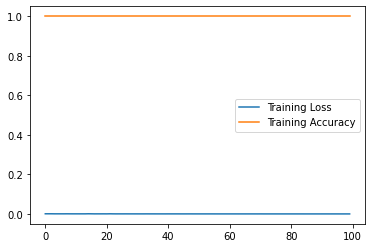

In [47]:
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.legend();
plt.show();

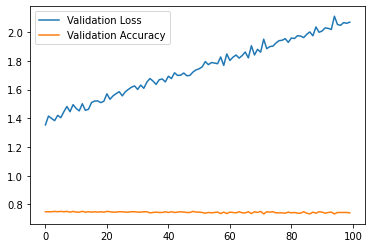

In [48]:
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend();
plt.show();

GET FILES FOR VISUALIZING THE NETWORK

+ The code below will download two files for visualizing how your network "sees" the sentiment related to each word. 
+ Head to http://projector.tensorflow.org/ and load these files, then click the "Sphereize" checkbox.

In [49]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [50]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [51]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PREDICTING THE SENTIMENT IN NEW REVIEWS

+ Take a look below at how we can predict sentiment in new reviews the network has never seen before.

In [55]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 
for review in fake_reviews:
  print(review)

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
for sequence in sample_sequences:
  print(sequence)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length) 
for padded_sequence in fakes_padded:
  print(padded_sequence) 

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'they gave us free chocolate cake', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']
I love this phone
I hate spaghetti
Everything was cold
Everything was hot exactly as I wanted
Everything was green
the host seated us immediately
they gave us free chocolate cake
not sure about the wilted flowers on the table
only works when I stand on tippy toes
does not work when I stand on my head
[4, 88, 9, 15]
[4, 372, 1]
[151, 10, 805]
[151, 10, 557, 703, 32, 4, 561]
[151, 10, 1]
[2, 1, 797, 197, 698]
[43, 549, 197, 379, 1, 1]
[14, 224, 104, 2, 1, 1, 21, 2, 493]
[65, 48, 77, 4, 1, 21, 1, 1]
[103, 14, 79, 77, 4, 1, 21, 12, 1]
[ 4 88  9 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [56]:
## predict the model
classes = model.predict(fakes_padded)
classes

1/1 [==============================] - 0s 270ms/step


array([[9.9999964e-01],
       [2.1815763e-09],
       [2.0959214e-09],
       [1.5296202e-09],
       [5.6496261e-05],
       [9.9999797e-01],
       [9.9999976e-01],
       [4.5734202e-12],
       [9.9999970e-01],
       [1.4127703e-11]], dtype=float32)

In [57]:
# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')


I love this phone
[0.99999964]


I hate spaghetti
[2.1815763e-09]


Everything was cold
[2.0959214e-09]


Everything was hot exactly as I wanted
[1.5296202e-09]


Everything was green
[5.649626e-05]


the host seated us immediately
[0.999998]


they gave us free chocolate cake
[0.99999976]


not sure about the wilted flowers on the table
[4.57342e-12]


only works when I stand on tippy toes
[0.9999997]


does not work when I stand on my head
[1.4127703e-11]




Here is the Basic Sentiment Analysis Project.

***